# Exploring trends and seasonal changes in data


In this notebook, We will identify trends and seasonal changes in data using Python statsmodels library. 

### 1. Importing Python libraries

In [1]:
import numpy as np
import pandas as pd
import calendar
from dateutil import tz

import matplotlib.pyplot as plt
import statsmodels as sm

#setting plot style
plt.style.use('seaborn')

#setting plot size
plt.rcParams['figure.figsize'] = [14,8]

### 2. Reading input file

In [2]:
file = '../Data/AucklandRainfall1872-1997.csv'
 
rain=pd.read_csv(file, skiprows=3, header=None,
                  names=['Date','rain_value', 'grade', 'interpol_type', 'event_timestamp'],
                  parse_dates=['Date'],
                  index_col='Date')

rain.head(5)

,rain_value,grade,interpol_type,event_timestamp
Date,,,,
1872-01-03,0.00,200,5,NaN
1872-01-04,3.81,200,5,NaN
1872-01-05,2.03,200,5,NaN
1872-01-09,0.00,200,5,NaN
1872-01-10,0.51,200,5,NaN


### 3. Preparing the table

We will prepare the input table by removing unnecessary columns and by resampling data to the mean monthly and annual values.

In [3]:
rain=rain.drop(columns=['event_timestamp', 'grade', 'interpol_type'])

#resampling the data to the average monthly and annual values
rain_monthly = rain.resample("M").mean()
rain_annual = rain.resample("A").mean()

display(rain_monthly.head())
display(rain_annual.head())

,rain_value
Date,
1872-01-31,0.917692
1872-02-29,6.810909
1872-03-31,5.115714
1872-04-30,5.624815
1872-05-31,3.402800


,rain_value
Date,
1872-12-31,4.456820
1873-12-31,4.429283
1874-12-31,3.863617
1875-12-31,4.938923
1876-12-31,4.053715


### 4. Data decomposition

To separate our data into three main components: general trend, seasonal variations, and the remaining random residuals, we will use Python's statsmodels library. The four graphs present, from the top,  measured rainfall, data trends, seasonal variations, and data residuals.

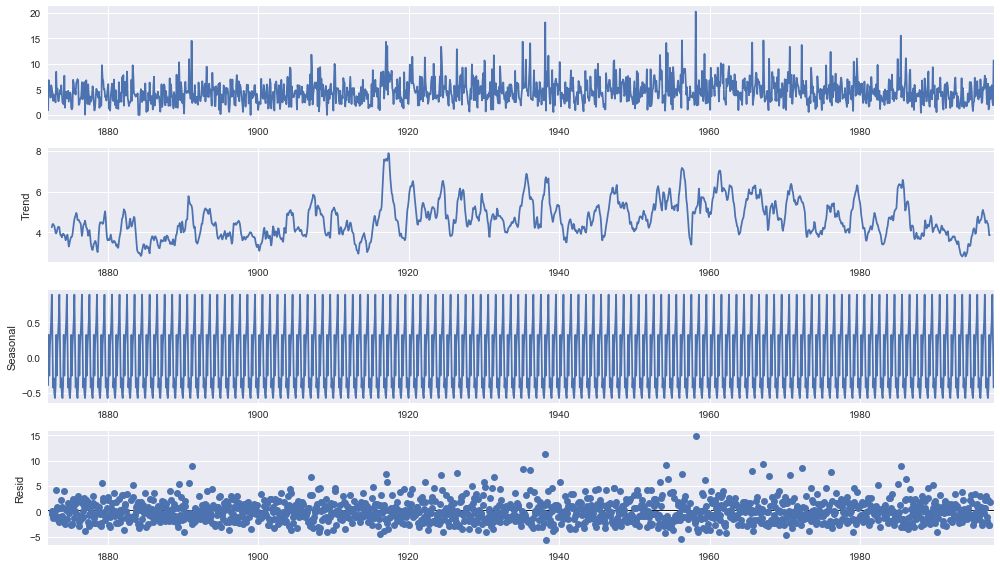

In [4]:
#importing seasonal_decompose module
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(rain_monthly).plot();

### 5. Zooming decomposed data

We will plot decomposed data for one ten year interval to examine variations more closely. The graphs clearly show seasonal changes for each year and long term variations. We will explore these changes using autocorrelation and differencing methods.

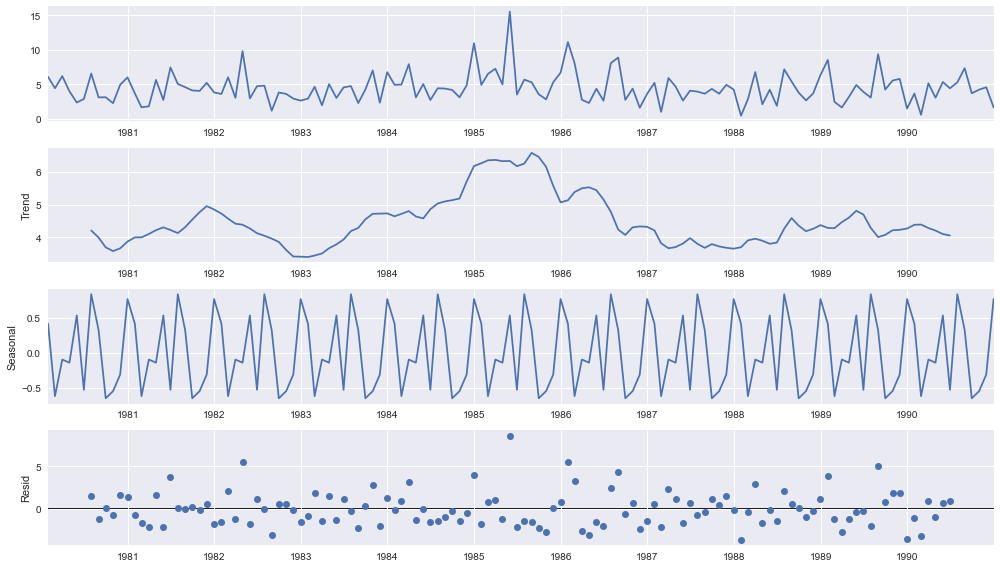

In [5]:
seasonal_decompose(rain_monthly['1980':'1990']).plot();

### 6. Autocorrelation

Autocorrelation is a valuable procedure for time-series data, showing how a variable is correlated to itself. To calculate the autocorrelation,  we will find the relationships between lagged values of time series. For example, we expect that each season, the amount of rain will approximately repeat at equally spaced intervals. Our autocorrelation function (ACF), displays a strong correlation for the months 1,2,3,10,11 and 12 and less significant for other months with the points inside the 95% confidence interval. A gradual drop in values from the maximum to the minimum indicates sesonal changes. 

Text(0, 0.5, 'ACF')

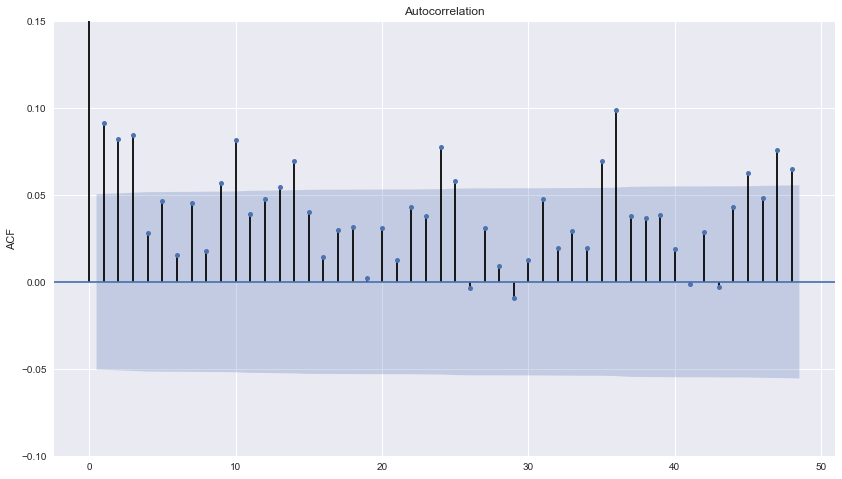

In [6]:
#importing plot_acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(rain_monthly.dropna(), lags = 48); 
plt.ylim(-0.1,0.15)
plt.ylabel('ACF')

### 7. Autocorrelation and differencing

A stationary time series has properties that do not change with time. By computing the difference between consecutive observations, we can make non-stationary data stationary, and therefore reduce trends and seasonal changes. Also, most popular time-series models require data to be stationary.  After applying differencing and autocorrelation on data, we can notice that all the monthly changes in the rainfall data are random. We are now ready for the time series models. 

            rain_value
Date                  
1872-01-31         NaN
1872-02-29    5.893217
1872-03-31   -1.695195
1872-04-30    0.509101
1872-05-31   -2.222015


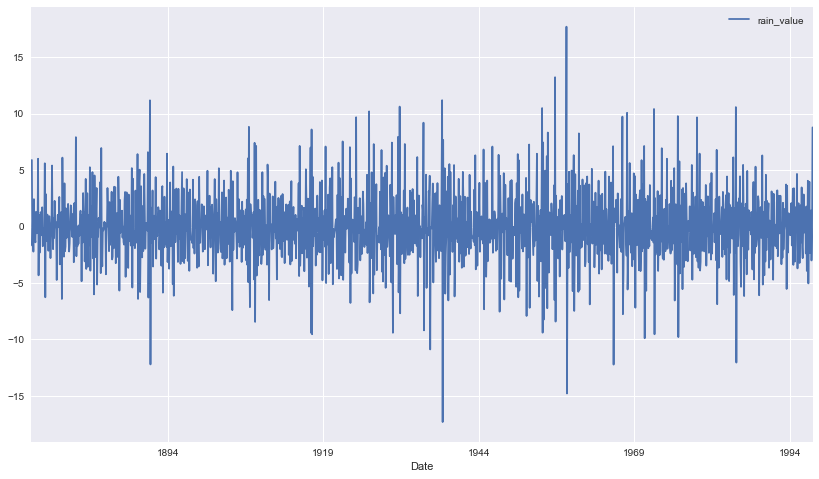

In [7]:
#first-order differencing
rain_monthly_diff = rain_monthly.diff()

print(rain_monthly_diff.head())

rain_monthly_diff.plot()

Text(0, 0.5, 'ACF')

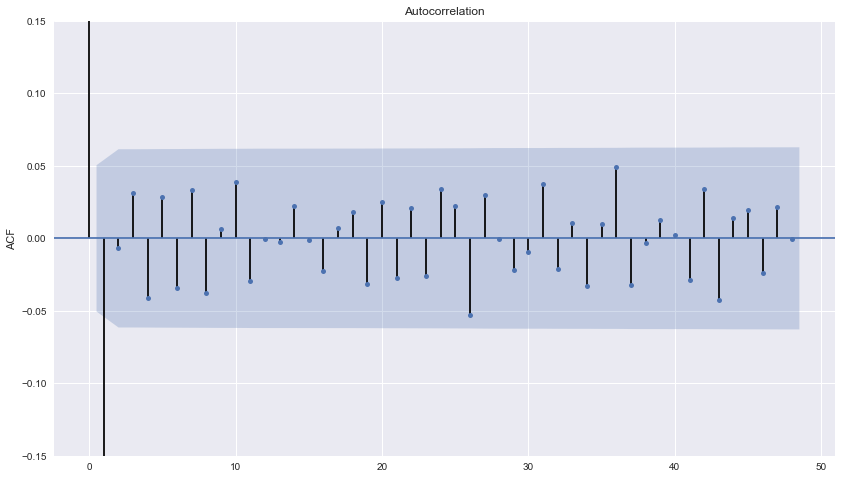

In [8]:
#plotting ACF of monthly differenced values
plot_acf(rain_monthly_diff.dropna(), lags = 48); 
plt.ylim(-0.15,0.15)
plt.ylabel('ACF')